# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Output function

We have to encode the output somehow, for two classes, the simplest solution is a single variable that should be 0 if there are more cards of color 0 and 1 if there are more cards of color 1.

### Training and label data.

So we can prepare some training data. In this simple case, all the possible configurations are actually known.


In [2]:
x_train = np.array([
    [0, 5],
    [1, 4],
    [2, 3],
    [3, 2],
    [4, 1],
    [5, 0],
], dtype=np.float32)
y_train = np.array([1, 1, 1, 0, 0, 0,], dtype=np.float32)
print(x_train)
print(y_train)

[[0. 5.]
 [1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]
 [5. 0.]]
[1. 1. 1. 0. 0. 0.]


### Normalisation

Input data can have different ranges. It is always a good idea (in other words absolutely essential) to normalize the input data. This is usually done into the range 0..1 or -1..1

In [3]:
x_train = x_train / 5.0
print(x_train)

[[0.  1. ]
 [0.2 0.8]
 [0.4 0.6]
 [0.6 0.4]
 [0.8 0.2]
 [1.  0. ]]


### A first network.

We will start with a very simple network, where we connect the inputs directly to the output. So there will be 2 variables, the weights for the connection and the bias. The output function is a sigmoid, which takes values between 0 and 1.

With keras, we first have to create the type of model we want (Sequential), and can then add layers. In the tensorflow implementation, we have to add the input_shape parameter in the first layer to tell it the format of the input. This does not include the batch dimension.

In [4]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, activation='sigmoid', input_shape=[2]))

Next we have to compile the model and tell it what loss function and optimizer we want to have. We will take a mean squared error for loss function first. (This is actually not optimal and will be corrected in an exercise).

Besides the loss, we usually want to look at some metrics. Here we choose accuracy, that measures how often the network makes the correct decision (see last lecture).

In [5]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


We can print some details about the model.

In [6]:
model.summary()
print(model.get_weights())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
[array([[0.0022459],
       [0.4276098]], dtype=float32), array([0.], dtype=float32)]


We can either train one batch, or we can use fit to train repeatedly. The result from the training is the loss function and the metric.

In [9]:
model.train_on_batch(x_train, y_train)

[0.21257041, 0.6666667]

We can now try to fit the data in minibatches multiple times. This will calculate the weights, so as to minimize the loss. We might not always get a good result in the first try and even this very simple network seems to need a large number of training steps.

In [10]:
model.fit(x_train, y_train, epochs=1000, batch_size=6)

Train on 6 samples
Epoch 1/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2125 - accuracy: 0.6667
Epoch 2/1000
6/6 [==============================] - 0s 538us/sample - loss: 0.2124 - accuracy: 0.6667
Epoch 3/1000
6/6 [==============================] - 0s 870us/sample - loss: 0.2123 - accuracy: 0.6667
Epoch 4/1000
6/6 [==============================] - 0s 589us/sample - loss: 0.2122 - accuracy: 0.6667
Epoch 5/1000
6/6 [==============================] - 0s 918us/sample - loss: 0.2121 - accuracy: 0.6667
Epoch 6/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2120 - accuracy: 0.6667
Epoch 7/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2119 - accuracy: 0.6667
Epoch 8/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2118 - accuracy: 0.6667
Epoch 9/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2117 - accuracy: 0.8333
Epoch 10/1000
6/6 [==============================] - 0s 1ms/sample - loss

Epoch 82/1000
6/6 [==============================] - 0s 586us/sample - loss: 0.2050 - accuracy: 0.8333
Epoch 83/1000
6/6 [==============================] - 0s 822us/sample - loss: 0.2050 - accuracy: 0.8333
Epoch 84/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2049 - accuracy: 0.8333
Epoch 85/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2048 - accuracy: 0.8333
Epoch 86/1000
6/6 [==============================] - 0s 772us/sample - loss: 0.2047 - accuracy: 0.8333
Epoch 87/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2046 - accuracy: 0.8333
Epoch 88/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2045 - accuracy: 0.8333
Epoch 89/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2044 - accuracy: 0.8333
Epoch 90/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2043 - accuracy: 0.8333
Epoch 91/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2042 - a

Epoch 162/1000
6/6 [==============================] - 0s 824us/sample - loss: 0.1982 - accuracy: 0.8333
Epoch 163/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.1981 - accuracy: 0.8333
Epoch 164/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1981 - accuracy: 0.8333
Epoch 165/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1980 - accuracy: 0.8333
Epoch 166/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1979 - accuracy: 0.8333
Epoch 167/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.1978 - accuracy: 0.8333
Epoch 168/1000
6/6 [==============================] - 0s 619us/sample - loss: 0.1977 - accuracy: 0.8333
Epoch 169/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1976 - accuracy: 0.8333
Epoch 170/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1976 - accuracy: 0.8333
Epoch 171/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.

Epoch 242/1000
6/6 [==============================] - 0s 719us/sample - loss: 0.1918 - accuracy: 0.8333
Epoch 243/1000
6/6 [==============================] - 0s 703us/sample - loss: 0.1918 - accuracy: 0.8333
Epoch 244/1000
6/6 [==============================] - 0s 609us/sample - loss: 0.1917 - accuracy: 0.8333
Epoch 245/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1916 - accuracy: 0.8333
Epoch 246/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1915 - accuracy: 0.8333
Epoch 247/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1915 - accuracy: 0.8333
Epoch 248/1000
6/6 [==============================] - 0s 777us/sample - loss: 0.1914 - accuracy: 0.8333
Epoch 249/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1913 - accuracy: 0.8333
Epoch 250/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1912 - accuracy: 0.8333
Epoch 251/1000
6/6 [==============================] - 0s 2ms/sample - loss

Epoch 322/1000
6/6 [==============================] - 0s 646us/sample - loss: 0.1859 - accuracy: 1.0000
Epoch 323/1000
6/6 [==============================] - 0s 575us/sample - loss: 0.1858 - accuracy: 1.0000
Epoch 324/1000
6/6 [==============================] - 0s 939us/sample - loss: 0.1858 - accuracy: 1.0000
Epoch 325/1000
6/6 [==============================] - 0s 855us/sample - loss: 0.1857 - accuracy: 1.0000
Epoch 326/1000
6/6 [==============================] - 0s 455us/sample - loss: 0.1856 - accuracy: 1.0000
Epoch 327/1000
6/6 [==============================] - 0s 942us/sample - loss: 0.1855 - accuracy: 1.0000
Epoch 328/1000
6/6 [==============================] - 0s 824us/sample - loss: 0.1855 - accuracy: 1.0000
Epoch 329/1000
6/6 [==============================] - 0s 768us/sample - loss: 0.1854 - accuracy: 1.0000
Epoch 330/1000
6/6 [==============================] - 0s 864us/sample - loss: 0.1853 - accuracy: 1.0000
Epoch 331/1000
6/6 [==============================] - 0s 474us/s

6/6 [==============================] - 0s 971us/sample - loss: 0.1804 - accuracy: 1.0000
Epoch 402/1000
6/6 [==============================] - 0s 641us/sample - loss: 0.1803 - accuracy: 1.0000
Epoch 403/1000
6/6 [==============================] - 0s 636us/sample - loss: 0.1803 - accuracy: 1.0000
Epoch 404/1000
6/6 [==============================] - 0s 827us/sample - loss: 0.1802 - accuracy: 1.0000
Epoch 405/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1801 - accuracy: 1.0000
Epoch 406/1000
6/6 [==============================] - 0s 660us/sample - loss: 0.1801 - accuracy: 1.0000
Epoch 407/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1800 - accuracy: 1.0000
Epoch 408/1000
6/6 [==============================] - 0s 589us/sample - loss: 0.1799 - accuracy: 1.0000
Epoch 409/1000
6/6 [==============================] - 0s 896us/sample - loss: 0.1799 - accuracy: 1.0000
Epoch 410/1000
6/6 [==============================] - 0s 416us/sample - loss: 0.179

Epoch 481/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1752 - accuracy: 1.0000
Epoch 482/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1751 - accuracy: 1.0000
Epoch 483/1000
6/6 [==============================] - 0s 708us/sample - loss: 0.1750 - accuracy: 1.0000
Epoch 484/1000
6/6 [==============================] - 0s 869us/sample - loss: 0.1750 - accuracy: 1.0000
Epoch 485/1000
6/6 [==============================] - 0s 693us/sample - loss: 0.1749 - accuracy: 1.0000
Epoch 486/1000
6/6 [==============================] - 0s 655us/sample - loss: 0.1749 - accuracy: 1.0000
Epoch 487/1000
6/6 [==============================] - 0s 740us/sample - loss: 0.1748 - accuracy: 1.0000
Epoch 488/1000
6/6 [==============================] - 0s 606us/sample - loss: 0.1747 - accuracy: 1.0000
Epoch 489/1000
6/6 [==============================] - 0s 826us/sample - loss: 0.1747 - accuracy: 1.0000
Epoch 490/1000
6/6 [==============================] - 0s 614us/sampl

6/6 [==============================] - 0s 661us/sample - loss: 0.1703 - accuracy: 1.0000
Epoch 561/1000
6/6 [==============================] - 0s 607us/sample - loss: 0.1703 - accuracy: 1.0000
Epoch 562/1000
6/6 [==============================] - 0s 647us/sample - loss: 0.1702 - accuracy: 1.0000
Epoch 563/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1701 - accuracy: 1.0000
Epoch 564/1000
6/6 [==============================] - 0s 762us/sample - loss: 0.1701 - accuracy: 1.0000
Epoch 565/1000
6/6 [==============================] - 0s 820us/sample - loss: 0.1700 - accuracy: 1.0000
Epoch 566/1000
6/6 [==============================] - 0s 747us/sample - loss: 0.1700 - accuracy: 1.0000
Epoch 567/1000
6/6 [==============================] - 0s 653us/sample - loss: 0.1699 - accuracy: 1.0000
Epoch 568/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1698 - accuracy: 1.0000
Epoch 569/1000
6/6 [==============================] - 0s 681us/sample - loss: 0.169

Epoch 640/1000
6/6 [==============================] - 0s 525us/sample - loss: 0.1657 - accuracy: 1.0000
Epoch 641/1000
6/6 [==============================] - 0s 537us/sample - loss: 0.1656 - accuracy: 1.0000
Epoch 642/1000
6/6 [==============================] - 0s 571us/sample - loss: 0.1656 - accuracy: 1.0000
Epoch 643/1000
6/6 [==============================] - 0s 640us/sample - loss: 0.1655 - accuracy: 1.0000
Epoch 644/1000
6/6 [==============================] - 0s 534us/sample - loss: 0.1655 - accuracy: 1.0000
Epoch 645/1000
6/6 [==============================] - 0s 443us/sample - loss: 0.1654 - accuracy: 1.0000
Epoch 646/1000
6/6 [==============================] - 0s 612us/sample - loss: 0.1654 - accuracy: 1.0000
Epoch 647/1000
6/6 [==============================] - 0s 420us/sample - loss: 0.1653 - accuracy: 1.0000
Epoch 648/1000
6/6 [==============================] - 0s 830us/sample - loss: 0.1652 - accuracy: 1.0000
Epoch 649/1000
6/6 [==============================] - 0s 643us/s

Epoch 719/1000
6/6 [==============================] - 0s 596us/sample - loss: 0.1614 - accuracy: 1.0000
Epoch 720/1000
6/6 [==============================] - 0s 799us/sample - loss: 0.1613 - accuracy: 1.0000
Epoch 721/1000
6/6 [==============================] - 0s 621us/sample - loss: 0.1613 - accuracy: 1.0000
Epoch 722/1000
6/6 [==============================] - 0s 616us/sample - loss: 0.1612 - accuracy: 1.0000
Epoch 723/1000
6/6 [==============================] - 0s 657us/sample - loss: 0.1612 - accuracy: 1.0000
Epoch 724/1000
6/6 [==============================] - 0s 663us/sample - loss: 0.1611 - accuracy: 1.0000
Epoch 725/1000
6/6 [==============================] - 0s 690us/sample - loss: 0.1611 - accuracy: 1.0000
Epoch 726/1000
6/6 [==============================] - 0s 710us/sample - loss: 0.1610 - accuracy: 1.0000
Epoch 727/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1610 - accuracy: 1.0000
Epoch 728/1000
6/6 [==============================] - 0s 799us/sam

Epoch 798/1000
6/6 [==============================] - 0s 929us/sample - loss: 0.1573 - accuracy: 1.0000
Epoch 799/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1573 - accuracy: 1.0000
Epoch 800/1000
6/6 [==============================] - 0s 885us/sample - loss: 0.1572 - accuracy: 1.0000
Epoch 801/1000
6/6 [==============================] - 0s 750us/sample - loss: 0.1572 - accuracy: 1.0000
Epoch 802/1000
6/6 [==============================] - 0s 817us/sample - loss: 0.1571 - accuracy: 1.0000
Epoch 803/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1571 - accuracy: 1.0000
Epoch 804/1000
6/6 [==============================] - 0s 543us/sample - loss: 0.1570 - accuracy: 1.0000
Epoch 805/1000
6/6 [==============================] - 0s 856us/sample - loss: 0.1570 - accuracy: 1.0000
Epoch 806/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.1569 - accuracy: 1.0000
Epoch 807/1000
6/6 [==============================] - 0s 732us/sample 

6/6 [==============================] - 0s 579us/sample - loss: 0.1535 - accuracy: 1.0000
Epoch 878/1000
6/6 [==============================] - 0s 467us/sample - loss: 0.1534 - accuracy: 1.0000
Epoch 879/1000
6/6 [==============================] - 0s 969us/sample - loss: 0.1534 - accuracy: 1.0000
Epoch 880/1000
6/6 [==============================] - 0s 468us/sample - loss: 0.1533 - accuracy: 1.0000
Epoch 881/1000
6/6 [==============================] - 0s 528us/sample - loss: 0.1533 - accuracy: 1.0000
Epoch 882/1000
6/6 [==============================] - 0s 510us/sample - loss: 0.1532 - accuracy: 1.0000
Epoch 883/1000
6/6 [==============================] - 0s 543us/sample - loss: 0.1532 - accuracy: 1.0000
Epoch 884/1000
6/6 [==============================] - 0s 658us/sample - loss: 0.1531 - accuracy: 1.0000
Epoch 885/1000
6/6 [==============================] - 0s 485us/sample - loss: 0.1531 - accuracy: 1.0000
Epoch 886/1000
6/6 [==============================] - 0s 670us/sample - loss: 0

Epoch 957/1000
6/6 [==============================] - 0s 625us/sample - loss: 0.1498 - accuracy: 1.0000
Epoch 958/1000
6/6 [==============================] - 0s 535us/sample - loss: 0.1497 - accuracy: 1.0000
Epoch 959/1000
6/6 [==============================] - 0s 643us/sample - loss: 0.1497 - accuracy: 1.0000
Epoch 960/1000
6/6 [==============================] - 0s 489us/sample - loss: 0.1497 - accuracy: 1.0000
Epoch 961/1000
6/6 [==============================] - 0s 409us/sample - loss: 0.1496 - accuracy: 1.0000
Epoch 962/1000
6/6 [==============================] - 0s 543us/sample - loss: 0.1496 - accuracy: 1.0000
Epoch 963/1000
6/6 [==============================] - 0s 557us/sample - loss: 0.1495 - accuracy: 1.0000
Epoch 964/1000
6/6 [==============================] - 0s 965us/sample - loss: 0.1495 - accuracy: 1.0000
Epoch 965/1000
6/6 [==============================] - 0s 879us/sample - loss: 0.1494 - accuracy: 1.0000
Epoch 966/1000
6/6 [==============================] - 0s 1ms/sam

We can predict the values from the training value. Why are the results floating point number and not 0 or 1? Does the result seem likely?

In [11]:
model.predict(x_train)

array([[0.7019055 ],
       [0.6275283 ],
       [0.5465814 ],
       [0.46309397],
       [0.38162577],
       [0.30631295]], dtype=float32)

We can also print the found weights for each layer:

In [12]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.name)
    print(weights)

dense
[array([[-0.68712   ],
       [ 0.98668176]], dtype=float32), array([-0.13029368], dtype=float32)]


How do we find the actual predictions? We use a threshold on the output of the sigmoid function.

In [13]:
model.predict(x_train) > 0.5

array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [False]])

### A larger network

Lets try a more complicated network with two hidden layers.

In [14]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])

And train it again...

In [15]:
model.fit(x_train, y_train, epochs=1000, batch_size=6)

Train on 6 samples
Epoch 1/1000
6/6 [==============================] - 1s 102ms/sample - loss: 0.2850 - accuracy: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 524us/sample - loss: 0.2849 - accuracy: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 574us/sample - loss: 0.2848 - accuracy: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 545us/sample - loss: 0.2847 - accuracy: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2846 - accuracy: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2845 - accuracy: 0.5000
Epoch 7/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2844 - accuracy: 0.5000
Epoch 8/1000
6/6 [==============================] - 0s 6ms/sample - loss: 0.2843 - accuracy: 0.5000
Epoch 9/1000
6/6 [==============================] - 0s 5ms/sample - loss: 0.2841 - accuracy: 0.5000
Epoch 10/1000
6/6 [==============================] - 0s 1ms/sample - loss

Epoch 82/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2773 - accuracy: 0.5000
Epoch 83/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2772 - accuracy: 0.5000
Epoch 84/1000
6/6 [==============================] - 0s 859us/sample - loss: 0.2771 - accuracy: 0.5000
Epoch 85/1000
6/6 [==============================] - 0s 789us/sample - loss: 0.2770 - accuracy: 0.5000
Epoch 86/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2769 - accuracy: 0.5000
Epoch 87/1000
6/6 [==============================] - 0s 673us/sample - loss: 0.2769 - accuracy: 0.5000
Epoch 88/1000
6/6 [==============================] - 0s 619us/sample - loss: 0.2768 - accuracy: 0.5000
Epoch 89/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2767 - accuracy: 0.5000
Epoch 90/1000
6/6 [==============================] - 0s 775us/sample - loss: 0.2766 - accuracy: 0.5000
Epoch 91/1000
6/6 [==============================] - 0s 709us/sample - loss: 0.27

Epoch 162/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2718 - accuracy: 0.5000
Epoch 163/1000
6/6 [==============================] - 0s 736us/sample - loss: 0.2717 - accuracy: 0.5000
Epoch 164/1000
6/6 [==============================] - 0s 917us/sample - loss: 0.2717 - accuracy: 0.5000
Epoch 165/1000
6/6 [==============================] - 0s 888us/sample - loss: 0.2716 - accuracy: 0.5000
Epoch 166/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2715 - accuracy: 0.5000
Epoch 167/1000
6/6 [==============================] - 0s 782us/sample - loss: 0.2715 - accuracy: 0.5000
Epoch 168/1000
6/6 [==============================] - 0s 853us/sample - loss: 0.2714 - accuracy: 0.5000
Epoch 169/1000
6/6 [==============================] - 0s 932us/sample - loss: 0.2714 - accuracy: 0.5000
Epoch 170/1000
6/6 [==============================] - 0s 731us/sample - loss: 0.2713 - accuracy: 0.5000
Epoch 171/1000
6/6 [==============================] - 0s 1ms/sample 

6/6 [==============================] - 0s 835us/sample - loss: 0.2678 - accuracy: 0.5000
Epoch 242/1000
6/6 [==============================] - 0s 889us/sample - loss: 0.2677 - accuracy: 0.5000
Epoch 243/1000
6/6 [==============================] - 0s 650us/sample - loss: 0.2677 - accuracy: 0.5000
Epoch 244/1000
6/6 [==============================] - 0s 834us/sample - loss: 0.2676 - accuracy: 0.5000
Epoch 245/1000
6/6 [==============================] - 0s 599us/sample - loss: 0.2676 - accuracy: 0.5000
Epoch 246/1000
6/6 [==============================] - 0s 687us/sample - loss: 0.2676 - accuracy: 0.5000
Epoch 247/1000
6/6 [==============================] - 0s 835us/sample - loss: 0.2675 - accuracy: 0.5000
Epoch 248/1000
6/6 [==============================] - 0s 679us/sample - loss: 0.2675 - accuracy: 0.5000
Epoch 249/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2674 - accuracy: 0.5000
Epoch 250/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.267

Epoch 321/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2647 - accuracy: 0.5000
Epoch 322/1000
6/6 [==============================] - 0s 939us/sample - loss: 0.2647 - accuracy: 0.5000
Epoch 323/1000
6/6 [==============================] - 0s 809us/sample - loss: 0.2646 - accuracy: 0.5000
Epoch 324/1000
6/6 [==============================] - 0s 806us/sample - loss: 0.2646 - accuracy: 0.5000
Epoch 325/1000
6/6 [==============================] - 0s 980us/sample - loss: 0.2646 - accuracy: 0.5000
Epoch 326/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2645 - accuracy: 0.5000
Epoch 327/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2645 - accuracy: 0.5000
Epoch 328/1000
6/6 [==============================] - 0s 929us/sample - loss: 0.2645 - accuracy: 0.5000
Epoch 329/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2644 - accuracy: 0.5000
Epoch 330/1000
6/6 [==============================] - 0s 1ms/sample - lo

Epoch 401/1000
6/6 [==============================] - 0s 763us/sample - loss: 0.2623 - accuracy: 0.3333
Epoch 402/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2623 - accuracy: 0.3333
Epoch 403/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.2622 - accuracy: 0.3333
Epoch 404/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2622 - accuracy: 0.3333
Epoch 405/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2622 - accuracy: 0.3333
Epoch 406/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2621 - accuracy: 0.3333
Epoch 407/1000
6/6 [==============================] - 0s 959us/sample - loss: 0.2621 - accuracy: 0.3333
Epoch 408/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2621 - accuracy: 0.3333
Epoch 409/1000
6/6 [==============================] - 0s 668us/sample - loss: 0.2621 - accuracy: 0.3333
Epoch 410/1000
6/6 [==============================] - 0s 858us/sample - loss

Epoch 481/1000
6/6 [==============================] - 0s 577us/sample - loss: 0.2603 - accuracy: 0.3333
Epoch 482/1000
6/6 [==============================] - 0s 639us/sample - loss: 0.2603 - accuracy: 0.3333
Epoch 483/1000
6/6 [==============================] - 0s 600us/sample - loss: 0.2603 - accuracy: 0.3333
Epoch 484/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2603 - accuracy: 0.3333
Epoch 485/1000
6/6 [==============================] - 0s 998us/sample - loss: 0.2603 - accuracy: 0.3333
Epoch 486/1000
6/6 [==============================] - 0s 931us/sample - loss: 0.2602 - accuracy: 0.3333
Epoch 487/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2602 - accuracy: 0.3333
Epoch 488/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2602 - accuracy: 0.3333
Epoch 489/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2602 - accuracy: 0.3333
Epoch 490/1000
6/6 [==============================] - 0s 1ms/sample - lo

Epoch 561/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 562/1000
6/6 [==============================] - 0s 728us/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 563/1000
6/6 [==============================] - 0s 975us/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 564/1000
6/6 [==============================] - 0s 610us/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 565/1000
6/6 [==============================] - 0s 754us/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 566/1000
6/6 [==============================] - 0s 435us/sample - loss: 0.2587 - accuracy: 0.3333
Epoch 567/1000
6/6 [==============================] - 0s 723us/sample - loss: 0.2586 - accuracy: 0.3333
Epoch 568/1000
6/6 [==============================] - 0s 661us/sample - loss: 0.2586 - accuracy: 0.3333
Epoch 569/1000
6/6 [==============================] - 0s 558us/sample - loss: 0.2586 - accuracy: 0.3333
Epoch 570/1000
6/6 [==============================] - 0s 945us/sam

Epoch 641/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2574 - accuracy: 0.3333
Epoch 642/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2574 - accuracy: 0.3333
Epoch 643/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2574 - accuracy: 0.3333
Epoch 644/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2574 - accuracy: 0.3333
Epoch 645/1000
6/6 [==============================] - 0s 557us/sample - loss: 0.2574 - accuracy: 0.3333
Epoch 646/1000
6/6 [==============================] - 0s 910us/sample - loss: 0.2573 - accuracy: 0.3333
Epoch 647/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2573 - accuracy: 0.3333
Epoch 648/1000
6/6 [==============================] - 0s 734us/sample - loss: 0.2573 - accuracy: 0.3333
Epoch 649/1000
6/6 [==============================] - 0s 926us/sample - loss: 0.2573 - accuracy: 0.3333
Epoch 650/1000
6/6 [==============================] - 0s 854us/sample - lo

Epoch 721/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2563 - accuracy: 0.1667
Epoch 722/1000
6/6 [==============================] - 0s 851us/sample - loss: 0.2563 - accuracy: 0.1667
Epoch 723/1000
6/6 [==============================] - 0s 672us/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 724/1000
6/6 [==============================] - 0s 794us/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 725/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 726/1000
6/6 [==============================] - 0s 642us/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 727/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 728/1000
6/6 [==============================] - 0s 703us/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 729/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2562 - accuracy: 0.1667
Epoch 730/1000
6/6 [==============================] - 0s 720us/sample - 

Epoch 801/1000
6/6 [==============================] - 0s 860us/sample - loss: 0.2553 - accuracy: 0.1667
Epoch 802/1000
6/6 [==============================] - 0s 990us/sample - loss: 0.2553 - accuracy: 0.1667
Epoch 803/1000
6/6 [==============================] - 0s 803us/sample - loss: 0.2553 - accuracy: 0.1667
Epoch 804/1000
6/6 [==============================] - 0s 746us/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 805/1000
6/6 [==============================] - 0s 507us/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 806/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 807/1000
6/6 [==============================] - 0s 464us/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 808/1000
6/6 [==============================] - 0s 749us/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 809/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2552 - accuracy: 0.1667
Epoch 810/1000
6/6 [==============================] - 0s 1ms/sample 

Epoch 881/1000
6/6 [==============================] - 0s 901us/sample - loss: 0.2544 - accuracy: 0.1667
Epoch 882/1000
6/6 [==============================] - 0s 427us/sample - loss: 0.2544 - accuracy: 0.1667
Epoch 883/1000
6/6 [==============================] - 0s 578us/sample - loss: 0.2544 - accuracy: 0.1667
Epoch 884/1000
6/6 [==============================] - 0s 724us/sample - loss: 0.2544 - accuracy: 0.1667
Epoch 885/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2544 - accuracy: 0.1667
Epoch 886/1000
6/6 [==============================] - 0s 654us/sample - loss: 0.2543 - accuracy: 0.1667
Epoch 887/1000
6/6 [==============================] - 0s 639us/sample - loss: 0.2543 - accuracy: 0.1667
Epoch 888/1000
6/6 [==============================] - 0s 432us/sample - loss: 0.2543 - accuracy: 0.1667
Epoch 889/1000
6/6 [==============================] - 0s 783us/sample - loss: 0.2543 - accuracy: 0.1667
Epoch 890/1000
6/6 [==============================] - 0s 442us/sam

6/6 [==============================] - 0s 697us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 961/1000
6/6 [==============================] - 0s 646us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 962/1000
6/6 [==============================] - 0s 905us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 963/1000
6/6 [==============================] - 0s 632us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 964/1000
6/6 [==============================] - 0s 800us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 965/1000
6/6 [==============================] - 0s 1ms/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 966/1000
6/6 [==============================] - 0s 620us/sample - loss: 0.2536 - accuracy: 0.1667
Epoch 967/1000
6/6 [==============================] - 0s 600us/sample - loss: 0.2535 - accuracy: 0.1667
Epoch 968/1000
6/6 [==============================] - 0s 598us/sample - loss: 0.2535 - accuracy: 0.1667
Epoch 969/1000
6/6 [==============================] - 0s 553us/sample - loss: 0.2

The results are not necessarly better, how does the prediction look now?

In [16]:
model.predict(x_train)

array([[0.4932548 ],
       [0.49539942],
       [0.49754414],
       [0.49968898],
       [0.50183386],
       [0.50397867]], dtype=float32)

In [17]:
for layer in model.layers:
    weights = layer.get_weights()
    print(layer)
    print(weights)

[array([[ 0.45013767, -0.5371253 ],
       [ 0.610062  , -0.8812417 ]], dtype=float32), array([-0.04074161,  0.        ], dtype=float32)]
[array([[-0.11267805,  0.54514104],
       [-1.1028581 ,  0.43521512]], dtype=float32), array([ 0.        , -0.06021461], dtype=float32)]
[array([[-0.8308472 ],
       [-0.49204785]], dtype=float32), array([0.09610101], dtype=float32)]


The larger network, does not seem to work better as the simpler one. Or is it maybe not large enough?

The problem is not the network, but the data, we just do not have enough data. So lets try to make up some more data artificially.


In [18]:
x_new = np.random.random(size=(10000,2))
y_new = np.zeros(10000, dtype=np.float32)
condition = (x_new[:,1] > x_new[:,0])
y_new[condition] = 1.0

In [19]:
model.fit(x_new, y_new, epochs=100, batch_size=100)

Train on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 0s 32us/sample - loss: 0.2518 - accuracy: 0.4405
Epoch 2/100
10000/10000 [==============================] - 0s 17us/sample - loss: 0.2515 - accuracy: 0.4492
Epoch 3/100
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2513 - accuracy: 0.4557
Epoch 4/100
10000/10000 [==============================] - 0s 15us/sample - loss: 0.2510 - accuracy: 0.4635
Epoch 5/100
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2508 - accuracy: 0.4734
Epoch 6/100
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2506 - accuracy: 0.4809
Epoch 7/100
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2503 - accuracy: 0.4897
Epoch 8/100
10000/10000 [==============================] - 0s 17us/sample - loss: 0.2501 - accuracy: 0.5009
Epoch 9/100
10000/10000 [==============================] - 0s 17us/sample - loss: 0.2499 - accuracy: 0.5075
Epoch

10000/10000 [==============================] - 0s 24us/sample - loss: 0.0935 - accuracy: 0.9454
Epoch 77/100
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0905 - accuracy: 0.9502
Epoch 78/100
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0878 - accuracy: 0.9549
Epoch 79/100
10000/10000 [==============================] - 0s 22us/sample - loss: 0.0851 - accuracy: 0.9589
Epoch 80/100
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0826 - accuracy: 0.9626
Epoch 81/100
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0802 - accuracy: 0.9662
Epoch 82/100
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0780 - accuracy: 0.9685
Epoch 83/100
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0758 - accuracy: 0.9725
Epoch 84/100
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0738 - accuracy: 0.9751
Epoch 85/100
10000/10000 [======

That seems better. Lets look how it performs on our original data.

In [20]:
model.predict(x_train)

array([[8.2261515e-01],
       [8.2261515e-01],
       [8.2261515e-01],
       [1.4623180e-01],
       [5.7416214e-03],
       [1.9466366e-04]], dtype=float32)

### Evaluation

We might want to check how the network performs on any data. For this, keras provides the evaluate function that will 
evaluate the loss and the metrics. So of course label (y) data is needed for that. 

In [21]:
model.evaluate(x_new, y_new)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05128694425821304, 0.9908]

Of course, we would normally do that on validation or test data not used during training.

In [22]:
x_val_new = np.random.random(size=(5000,2))
y_val_new = np.zeros(5000, dtype=np.float32)
y_val_new[x_val_new[:,1] > x_val_new[:,0]] = 1.0
model.evaluate(x_val_new, y_val_new)

5000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.05027705487012863, 0.991]

### Visualisation

It is essential to visualise the training process to see what is going on. In Keras, an easy method to do this is to use the history object that is returned from fit. It contains the metrics and the loss.

We will also split our data into training and validation for this test. We rebuild the model, so that it is initialized again. Otherwise we would just continue with the weights from the previous fit.

In [23]:
model = keras.Sequential()
model.add(keras.layers.Dense(2, activation='relu', input_shape=[2]))
model.add(keras.layers.Dense(2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(x_new, y_new, validation_split=0.25, epochs=50, batch_size=100)

Train on 7500 samples, validate on 2500 samples
Epoch 1/50
7500/7500 [==============================] - 0s 67us/sample - loss: 0.2500 - accuracy: 0.4933 - val_loss: 0.2500 - val_accuracy: 0.4944
Epoch 2/50
7500/7500 [==============================] - 0s 24us/sample - loss: 0.2500 - accuracy: 0.4909 - val_loss: 0.2500 - val_accuracy: 0.4944
Epoch 3/50
7500/7500 [==============================] - 0s 25us/sample - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2500 - val_accuracy: 0.5056
Epoch 4/50
7500/7500 [==============================] - 0s 22us/sample - loss: 0.2500 - accuracy: 0.4957 - val_loss: 0.2500 - val_accuracy: 0.5056
Epoch 5/50
7500/7500 [==============================] - 0s 24us/sample - loss: 0.2500 - accuracy: 0.4947 - val_loss: 0.2500 - val_accuracy: 0.5056
Epoch 6/50
7500/7500 [==============================] - 0s 22us/sample - loss: 0.2500 - accuracy: 0.4920 - val_loss: 0.2500 - val_accuracy: 0.5056
Epoch 7/50
7500/7500 [==============================] - 0s 23us/sample

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

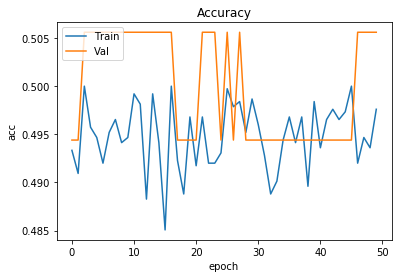

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

## Exercise: Correct loss function

The loss function used above (mse) is not optimal. A better loss function would be the crossentropy. Change the network to use that loss function.

## Exercise: Maximum of 4 colors

Implement a network that will receive 4 colors and has to select one of them.

This will require a change of the labels (y) that now take values of 0, 1, 2 or 3. However, networks do not use labels in that form directly for multi class classification, but use 1-hot encoded or categorical data instead.

In keras there is a function `keras.utils.to_categorical` that can be used for that.

The last layer in the network should then no longer be sigmoid, but the softmax function. And we need the multiclass form of the crossentropy function, which in keras is called `categorical_crossentropy`.


In [ ]:
x_train= np.random.random(size=(5000,4))
y_train_label = np.argmax(x_train, axis=1)


## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to get the trump from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the number of cards of a color as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [ ]:
import pandas as pd
from pathlib import Path
path_to_data = Path('data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None, nrows=1000)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data.drop('user', axis='columns', inplace=True)
data.head()



Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train